 ### Importando e Explorando o Dataset


In [18]:
import pandas as pd
import numpy as np
import pylab as plt
df = pd.read_csv('titanic.csv')

In [19]:
df.head()

,classe,sobreviveu,nome,sexo,idade,num-irmaos-conjuges,num-pais-filhos,num-bilhete,tarifa,cabine,porto de embarque,salva-vidas,num-corpo,origem-dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Visualizar o tipo dos dados de cada coluna:

In [20]:
df.dtypes

classe                   int64
sobreviveu               int64
nome                    object
sexo                    object
idade                  float64
num-irmaos-conjuges      int64
num-pais-filhos          int64
num-bilhete             object
tarifa                 float64
cabine                  object
porto de embarque       object
salva-vidas             object
num-corpo              float64
origem-dest             object
dtype: object

Para um entendimento mais acertivo sobre o modelo de dados, julgou-se necessário analisar algumas métricas dos dados através de técnicas de análise descritiva. Este procedimento pode ser aplicado apenas à atributos quantitativos pois os mesmos possibilitam operações aritméticas.

As medidas extraídas foram:
* Média
* Desvio padrão
* Mínimo
* Máximo
* Quartis (%) 25 - 50 - 75

In [21]:
df.describe()

,classe,sobreviveu,idade,num-irmaos-conjuges,num-pais-filhos,tarifa,num-corpo
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


Através da tabela acima os dados foram analisados com o objetivo de buscar informações interessantes partir das métricas extraídas, a seguir são listadas algumas características interessante sobre os passageiros:

* O atributo num-corpo não extraí nenhuma nova característica com Análise descritiva;
* A média de tarifas (valor pago) foi de 33, porém o desvio padrão está próximo a 51, o que destaca a diferença entre os valores pagos por diferentes passageiros. Segundo a base de dados, o valor mais baixo pago foi de 7.89 enquanto o maior foi de 512.32;
* A idade média dos passageiros era de aproximadamente 29 anos com um desvio padrão próximo a 14 anos. Aqui pode-se evidenciar a uma variação grande de idade em relação a média;
* A média da classe de passageiros foi de 2.29 com um desvio padrão de 0.83, o que também demonstra uma variação grande. A partir dessa informação pode-se dizer que existiam mais passageiros nas classes 1 e 3, que justifica essa média com um desvio padrão alto;
* A média de irmaõs/conjugês é de aproximadamente 0.50 por passageiro, segundo a média. Também deve-se evidenciar que o desvio padrão, para este caso, foi maior que a média;
* A média de passageiros com pais/filhos era de aproximadamente 0.38. O desvio padrão também foi maior que a média;
* Passageiro mais velho: 80 anos;
* Passageiro mais novo: 0.16 (possívelmente um bebê).

Após extrair essas informações é interessante verificar sua integridade, para isso foram identificados valores nulos nas variáveis com o objetivo de encontrar possíveis situações que poderiam interferir nas conclusões acima.

In [22]:
df.isnull().sum()

classe                    0
sobreviveu                0
nome                      0
sexo                      0
idade                   263
num-irmaos-conjuges       0
num-pais-filhos           0
num-bilhete               0
tarifa                    1
cabine                 1014
porto de embarque         2
salva-vidas             823
num-corpo              1188
origem-dest             564
dtype: int64

Dentre as variáveis estudas, podemos verificar que:
* 263 registros estão faltando para o atributo idade. Neste sentido;
* Pode-se verificar que existem 1014 registros faltantes, tornando a variável praticamente inutilizada para qualquer análise;
* Os atributos bote salva-vidas e origem-estino também contém um número alto de dados faltantes.

Agora que temos uma ideia geral do conteúdo do conjunto de dados, pode-se estudar mais a fundo cada coluna. Foi realizada uma análise exploratória de cada coluna, ilustradas abaixo.

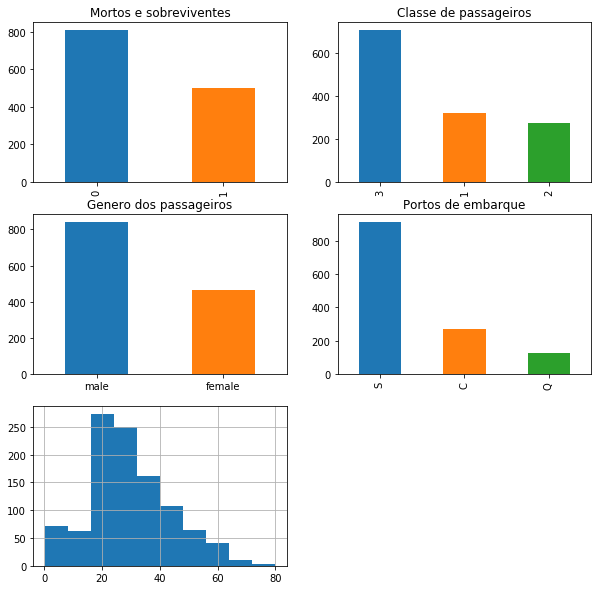

In [36]:
# Configurando grid de gráficos
plt.rc('figure', figsize=(10, 5))
fizsize_with_subplots = (10, 10)
bin_size = 10

fig = plt.figure(figsize=fizsize_with_subplots) 
fig_dims = (3, 2)

# Gráfico que identifica o NNúmero de mortos e sobreviventes
plt.subplot2grid(fig_dims, (0, 0))
df['sobreviveu'].value_counts().plot(kind='bar', 
                                         title='Mortos e sobreviventes')

# Gráfico que identifica a frequência das classes do navio
plt.subplot2grid(fig_dims, (0, 1))
df['classe'].value_counts().plot(kind='bar', 
                                       title='Classe de passageiros')

# Gráfico que identifica o sexo dos passageiros
plt.subplot2grid(fig_dims, (1, 0))
df['sexo'].value_counts().plot(kind='bar', 
                                    title='Genero dos passageiros')
plt.xticks(rotation=0)

# Gráfico que identifica os portos de embarque
plt.subplot2grid(fig_dims, (1, 1))
df['porto de embarque'].value_counts().plot(kind='bar', 
                                         title='Portos de embarque')

# Gráfico que identifica as idades dos passageiros
plt.subplot2grid(fig_dims, (2, 0))
df['idade'].hist()